* MLP 

     The dataset of interest is the Pima Indians Dataset.   
     We will be using it to show how to Serialize our models to JSON and HDF5f format.

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [42]:
seed = 7 # fixing random seed for reproducibility
numpy.random.seed(seed)

In [43]:
# loading the dataset of interet 

In [44]:
dataset = numpy.loadtxt("Pima-Indians-Diabetes.csv", delimiter=",", skiprows=2)

In [45]:
# splitting the dataset of interest into input (X) and output (Y) variables 

In [46]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=2018)

In [48]:
# Create model
model = Sequential()
model.add(Dense(16, input_dim=8, kernel_initializer='uniform', activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu'))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid'))

In [49]:
# Compile model

In [50]:
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

In [51]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)

In [52]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.08%


In [55]:
# Serialize model to JSON

In [56]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [57]:
# serialize weights to HDF5

In [61]:
print("Saving the  model to disk.....")
model.save_weights("model.h5")

Saving the  model to disk.....


In [62]:
# Loading model

In [66]:
print("Loading model in a read mode....")
json_file = open('model.json', 'r' )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

Loading model in a read mode....


In [67]:
# load weights into new model

In [68]:
loaded_model.load_weights("model.h5")
print("Loading  model from disk")

Loaded model from disk


In [69]:
# evaluate loaded model on test data

In [72]:
loaded_model.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 79.14%


# Visualizing the Model Training History in Keras

In [91]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

In [92]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [93]:
# splitting the dataset of interest into input (X) and output (Y) variables 

In [94]:
dataset = numpy.loadtxt("Pima-Indians-Diabetes.csv", delimiter=",", skiprows=2)

In [95]:
# load the dataset of interet 

In [96]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [97]:
# create model

In [98]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation='relu'))
model.add(Dense(8, kernel_initializer = 'uniform' , activation= 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform' , activation= 'sigmoid'))

In [99]:
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])

In [102]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epoch')

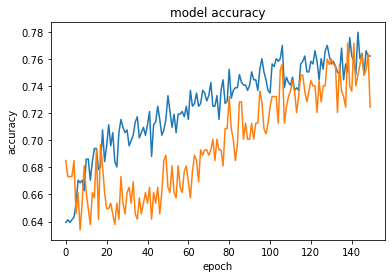

In [105]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

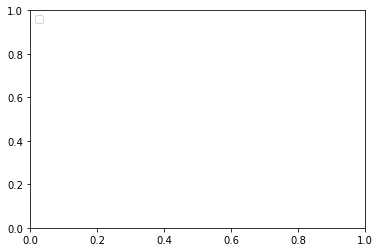

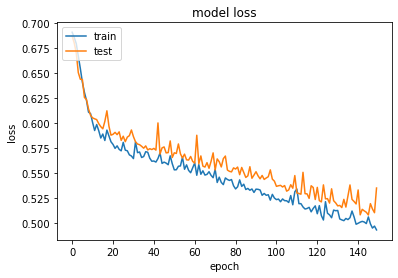

In [113]:
plt.legend(["train" , "test"], loc= 'upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc='upper left')
plt.show()